### LangGraph 챗봇 구축

In [ ]:
from dotenv import load_dotenv

load_dotenv()

In [1]:
from langchain_teddynote import logging

logging.langsmith("edu-CH17-LangGraph-Modules")

LangSmith 추적을 시작합니다.
[프로젝트명]
edu-CH17-LangGraph-Modules


### Step-by-Step

### SETP 1. 상태(State) 정의

In [2]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

### STEP 2. 노트(Node) 정의

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

def chatbot(state: State):
    # 메시지 누적
    return {"messages": [llm.invoke(state["messages"])]}

### STEP 3. 그래프(graph) 정의, 노드 추가 

In [6]:
graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)

### STEP 4. 그래프 엣지(Edge) 추가

In [7]:
graph_builder.add_edge(START, "chatbot")

In [8]:
graph_builder.add_edge("chatbot", END)

### STEP 5. 그래프 컴파일(compile)

In [9]:
graph = graph_builder.compile()

### STEP 6. 그래프 시각화

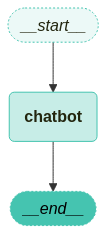

In [10]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(graph)

### STEP 7. 그래프 실행

In [11]:
question = "서울의 유명한 맛집 TOP 10 추천해줘"

for event in graph.stream({"messages": [("user", question)]}):
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)

Assistant: 서울에는 다양한 맛집이 많아서 선택하기가 쉽지 않지만, 다음은 서울에서 유명한 맛집 TOP 10을 추천해 드립니다. 각 식당은 고유의 매력을 가지고 있으니 참고해 보세요!

1. **광장시장** - 전통 시장으로, 빈대떡, 마약김밥, 떡볶이 등 다양한 길거리 음식을 즐길 수 있습니다.

2. **이태원 부대찌개** - 부대찌개로 유명한 이곳은 푸짐한 양과 깊은 맛으로 많은 사랑을 받고 있습니다.

3. **명동교자** - 칼국수와 만두가 유명한 곳으로, 항상 많은 사람들이 줄 서서 기다리는 인기 맛집입니다.

4. **삼청동 수제비** - 수제비와 전통 한식을 즐길 수 있는 아늑한 분위기의 식당입니다.

5. **한남동 고기리 막창** - 신선한 막창과 다양한 고기 요리를 제공하는 곳으로, 고기 애호가들에게 추천합니다.

6. **을지로 골뱅이** - 골뱅이 무침과 소주가 잘 어울리는 곳으로, 분위기도 좋고 맛도 뛰어납니다.

7. **홍대 돈부리** - 일본식 덮밥 전문점으로, 다양한 종류의 돈부리를 맛볼 수 있습니다.

8. **신사동 가로수길** - 다양한 카페와 레스토랑이 모여 있는 곳으로, 특히 브런치 카페가 많아 인기가 높습니다.

9. **종로 통인시장** - 전통 시장으로, 다양한 먹거리를 즐길 수 있으며, 특히 찐빵과 떡이 유명합니다.

10. **압구정 로데오거리** - 고급 레스토랑과 카페가 많은 지역으로, 다양한 세계 요리를 경험할 수 있습니다.

이 외에도 서울에는 많은 맛집이 있으니, 방문하실 때마다 새로운 곳을 탐방해 보세요!


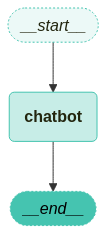

서울에는 다양한 맛집이 많아서 선택하기가 쉽지 않지만, 다음은 서울에서 유명한 맛집 TOP 10을 추천해 드립니다. 각 식당은 고유의 매력을 가지고 있으니 참고해 보세요!

1. **광장시장** - 전통 시장으로, 빈대떡, 마약김밥, 떡볶이 등 다양한 길거리 음식을 즐길 수 있습니다.

2. **부암동 카페거리** - 예쁜 카페와 맛있는 디저트가 많은 곳으로, 특히 '카페 드 파리'의 생과일 빙수가 유명합니다.

3. **이태원 앤틱 가구 거리** - 다양한 국제 요리를 즐길 수 있는 곳으로, '부리또'와 '타코'가 인기 있는 멕시코 음식점들이 많습니다.

4. **명동 교자** - 칼국수와 만두가 유명한 맛집으로, 항상 많은 사람들이 줄 서서 기다리는 곳입니다.

5. **삼청동 수제비** - 전통 수제비와 함께 다양한 한식을 즐길 수 있는 곳으로, 분위기도 좋습니다.

6. **신사동 가로수길** - 다양한 트렌디한 카페와 레스토랑이 모여 있는 곳으로, '카페 마마스'의 샌드위치가 인기입니다.

7. **종로 통인시장** - 다양한 전통 음식을 맛볼 수 있는 시장으로, 특히 '김밥'과 '떡볶이'가 유명합니다.

8. **홍대** - 다양한 음식점과 카페가 밀집해 있는 지역으로, '홍대 돈부리'의 일본식 덮밥이 인기입니다.

9. **압구정 로데오거리** - 고급 레스토랑과 카페가 많은 곳으로, '스시조'의 초밥이 유명합니다.

10. **강남역** - 다양한 패스트푸드와 한식, 중식, 일식 등 다양한 음식을 즐길 수 있는 곳으로, '강남역 쭈꾸미'가 인기입니다.

이 외에도 서울에는 많은 맛집이 있으니, 방문하실 때마다 새로운 곳을 발견해 보세요!


In [12]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langchain_teddynote.graphs import visualize_graph


###### STEP 1. 상태(State) 정의 ######
class State(TypedDict):
    # 메시지 정의(list type 이며 add_messages 함수를 사용하여 메시지를 추가)
    messages: Annotated[list, add_messages]


###### STEP 2. 노드(Node) 정의 ######
# LLM 정의
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)


# 챗봇 함수 정의
def chatbot(state: State):
    # 메시지 호출 및 반환
    return {"messages": [llm.invoke(state["messages"])]}


###### STEP 3. 그래프(Graph) 정의, 노드 추가 ######
# 그래프 생성
graph_builder = StateGraph(State)

# 노드 이름, 함수 혹은 callable 객체를 인자로 받아 노드를 추가
graph_builder.add_node("chatbot", chatbot)

###### STEP 4. 그래프 엣지(Edge) 추가 ######
# 시작 노드에서 챗봇 노드로의 엣지 추가
graph_builder.add_edge(START, "chatbot")

# 그래프에 엣지 추가
graph_builder.add_edge("chatbot", END)

###### STEP 5. 그래프 컴파일(compile) ######
# 그래프 컴파일
graph = graph_builder.compile()

###### STEP 6. 그래프 시각화 ######
# 그래프 시각화
visualize_graph(graph)

###### STEP 7. 그래프 실행 ######
question = "서울의 유명한 맛집 TOP 10 추천해줘"

# 그래프 이벤트 스트리밍
for event in graph.stream({"messages": [("user", question)]}):
    # 이벤트 값 출력
    for value in event.values():
        print(value["messages"][-1].content)